In [1]:
import pandas as pd
import numpy as np

import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math 
import seaborn as sns
import matplotlib.colors as mcolors
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.formula.api import mixedlm
colors = list(mcolors.TABLEAU_COLORS.keys())*2
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


full_names = {
    'AU': 'Australia',
    'BR': 'Brazil',
    'CA': 'Canada',
    'FR': 'France',
    'DE': 'Germany',
    'IN': 'India',
    'IT': 'Italy',
    #'JP': 'Japan',
    #'KE': 'Kenia',
    'MX': 'Mexico',
    #'NG': 'Nigeria',
    'ES': 'Spain',
    'GB': 'United Kingdom',
    'US': 'United States',
    'DK': 'Denmark'
}

In [2]:
event_dicts = [{'country': 'AU',
  'start_md_1': '2020-03-27',
  'end_md_1': '2020-06-07',
  'start_md_2': np.nan},
 {'country': 'BR',
  'start_md_1': '2020-03-23',
  'end_md_1': '2020-08-09',
  'start_md_2': np.nan},
 {'country': 'CA',
  'start_md_1': '2020-03-19',
  'end_md_1': '2020-06-21',
  'start_md_2': '2020-10-12'},
 {'country': 'DE',
  'start_md_1': '2020-03-21',
  'end_md_1': '2020-05-09',
  'start_md_2': '2020-12-18'},
 {'country': 'DK',
  'start_md_1': '2020-03-17',
  'end_md_1': '2020-05-07',
  'start_md_2': np.nan},
 {'country': 'ES',
  'start_md_1': '2020-03-17',
  'end_md_1': '2020-06-14',
  'start_md_2': '2020-11-07'},
 {'country': 'FR',
  'start_md_1': '2020-03-18',
  'end_md_1': '2020-06-08',
  'start_md_2': '2020-11-01'},
 {'country': 'GB',
  'start_md_1': '2020-03-23',
  'end_md_1': '2020-08-03',
  'start_md_2': '2020-10-21'},
 {'country': 'IN',
  'start_md_1': '2020-03-24',
  'end_md_1': '2020-10-29',
  'start_md_2': np.nan},
 {'country': 'IT',
  'start_md_1': '2020-03-11',
  'end_md_1': '2020-06-06',
  'start_md_2': '2020-11-06'},
 {'country': 'JP',
  'start_md_1': '2020-04-12',
  'end_md_1': '2020-05-30',
  'start_md_2': np.nan},
 {'country': 'KE',
  'start_md_1': '2020-03-24',
  'end_md_1': '2020-10-04',
  'start_md_2': np.nan},
 {'country': 'MX',
  'start_md_1': '2020-03-25',
  'end_md_1': '2020-10-06',
  'start_md_2': np.nan},
 {'country': 'NG',
  'start_md_1': '2020-03-27',
  'end_md_1': '2020-08-09',
  'start_md_2': np.nan},
 {'country': 'US',
  'start_md_1': '2020-03-21',
  'end_md_1': '2020-06-11',
  'start_md_2': '2020-11-26'}]

In [3]:
df_events = pd.DataFrame(event_dicts)

In [4]:
df_events['start_md_1'] = pd.to_datetime(df_events['start_md_1'])
df_events['end_md_1'] = pd.to_datetime(df_events['end_md_1'])
df_events['start_md_2'] = pd.to_datetime(df_events['start_md_2'])

In [5]:
df_agg = pd.read_pickle('dk_new_df_agg_cats2.pickle')

In [6]:
df_agg

country                   category  \
0        FR                    dessert   
1        FR                 soft drink   
2        FR                  rice dish   
3        FR                       soup   
4        FR                      spice   
..      ...                        ...   
415      DK                   cocktail   
416      DK                      salad   
417      DK                   sandwich   
418      DK                    sausage   
419      DK  pastry and bakery product   

                                   volume_weekly_total  \
0    2019-01-06    2039.955977
2019-01-13    2326.4...   
1    2019-01-06    121.671207
2019-01-13    129.083...   
2    2019-01-06    302.488958
2019-01-13    311.905...   
3    2019-01-06    401.235196
2019-01-13    366.711...   
4    2019-01-06    388.295133
2019-01-13    396.663...   
..                                                 ...   
415  2019-01-06     34.420517
2019-01-13     32.986...   
416  2019-01-06    40.275451
2019-01-13    45.20149...   
417  2019-01-06    12.457403
2019-01-13    10.75246...   
418  2019-01-06    10.073876
2019-01-13    10.67101...   
419  2019-01-06    13.449992
2019-01-13    16.34817...   

                                 volume_weekly_total_l  \
0    2019-01-06    1835.859784
2019-01-13    2099.2...   
1    2019-01-06    114.391114
2019-01-13    121.331...   
2    2019-01-06    278.087672
2019-01-13    287.005...   
3    2019-01-06    369.185323
2019-01-13    337.439...   
4    2019-01-06    355.745896
2019-01-13    363.625...   
..                                                 ...   
415  2019-01-06     31.581825
2019-01-13     30.403...   
416  2019-01-06    37.351432
2019-01-13    42.03056...   
417  2019-01-06    11.985026
2019-01-13    10.36668...   
418  2019-01-06     9.747320
2019-01-13    10.32124...   
419  2019-01-06    12.948975
2019-01-13    15.73364...   

                                 volume_weekly_total_h  \
0    2019-01-06    2268.661639
2019-01-13    2580.8...   
1    2019-01-06    129.498450
2019-01-13    137.439...   
2    2019-01-06    329.392011
2019-01-13    339.326...   
3    2019-01-06    436.562920
2019-01-13    399.011...   
4    2019-01-06    424.161427
2019-01-13    433.033...   
..                                                 ...   
415  2019-01-06     37.815074
2019-01-13     36.177...   
416  2019-01-06    43.497477
2019-01-13    48.70743...   
417  2019-01-06    12.999977
2019-01-13    11.19724...   
418  2019-01-06    10.449219
2019-01-13    11.06057...   
419  2019-01-06    14.141612
2019-01-13    17.11315...   

                           volume_percent_weekly_total  
0    2019-01-06    0.181580
2019-01-13    0.198787
...  
1    2019-01-06    0.010830
2019-01-13    0.011030
...  
2    2019-01-06    0.026925
2019-01-13    0.026651
...  
3    2019-01-06    0.035715
2019-01-13    0.031334
...  
4    2019-01-06    0.034563
2019-01-13    0.033893
...  
..                                                 ...  
415  2019-01-06    0.021234
2019-01-13    0.020476
...  
416  2019-01-06    0.024845
2019-01-13    0.028058
...  
417  2019-01-06    0.007685
2019-01-13    0.006674
...  
418  2019-01-06    0.006214
2019-01-13    0.006624
...  
419  2019-01-06    0.008297
2019-01-13    0.010148
...  

[420 rows x 6 columns]

In [7]:
weeks_2019 = list(df_agg.iloc[0]['volume_weekly_total'].index)[:52]
weeks_2020 = list(df_agg.iloc[0]['volume_weekly_total'].index)[52:]

In [8]:
l = []
for cnt, row in df_agg.iterrows():
    start_md = df_events.loc[df_events['country'] == row['country']].iloc[0]['start_md_1']
    end_md = df_events.loc[df_events['country'] == row['country']].iloc[0]['end_md_1']
    start_md2 = df_events.loc[df_events['country'] == row['country']].iloc[0]['start_md_2']
    
    for week in zip(row['volume_weekly_total'].index,row['volume_weekly_total'].values,row['volume_percent_weekly_total'].values):
        
        entry = {}

        entry['country'] = row['country']
        entry['category'] = row['category']
        

        if week[0] in weeks_2020:
            date = pd.to_datetime(week[0])

            if type(start_md2)!=pd._libs.tslibs.nattype.NaTType and date > start_md2:
                continue

            entry['k'] = math.floor(((date - start_md).days +7) / 7)
            entry['volume_total'] = week[1]
            entry['volume_percent'] = week[2]
            entry['year'] = '2020'
            l.append(entry)

        elif week[0] in weeks_2019:
            date = pd.to_datetime(weeks_2020[weeks_2019.index(week[0])])
            
            if type(start_md2)!=pd._libs.tslibs.nattype.NaTType and date > start_md2:
                continue

            entry['k'] = math.floor(((date - start_md).days +7) / 7)
            entry['volume_total'] = week[1]
            entry['volume_percent'] = week[2]
            entry['year'] = '2019'
            l.append(entry)

        

In [9]:
df = pd.DataFrame(l)

In [10]:
#df.to_pickle('df_RDD_mobility_decrease')

### Check what is the highest bandwidth we can have

In [11]:
df.groupby('country').agg('k').max()

country
AU    40
BR    40
CA    30
DE    39
DK    41
ES    33
FR    33
GB    30
IN    40
IT    34
JP    38
KE    40
MX    40
NG    40
US    36
Name: k, dtype: int64

In [12]:
df.groupby('country').agg('k').min()

country
AU   -11
BR   -11
CA   -10
DE   -10
DK   -10
ES   -10
FR   -10
GB   -11
IN   -11
IT    -9
JP   -13
KE   -11
MX   -11
NG   -11
US   -10
Name: k, dtype: int64

In [13]:
df.groupby('country').agg('k').max().min()

30

In [14]:
df = df.loc[(df['k'] >= -30) & (df['k'] <= 30)]

In [15]:
# 61 weeks, 14 countries, 32 categories

(2*30+1)*12*32*2

46848

In [16]:
df = df.loc[(df['country'].isin(list(full_names.keys())))]

In [17]:
len(df)

27776

In [18]:
df['intervention_flag'] = df['k'].apply(lambda x: 1 if x >= 0 else 0)

In [19]:
df.head()

country category   k  volume_total  volume_percent  year  intervention_flag
0      FR  dessert -10   2039.955977        0.181580  2019                  0
1      FR  dessert  -9   2326.485943        0.198787  2019                  0
2      FR  dessert  -8   2606.733177        0.215539  2019                  0
3      FR  dessert  -7   3202.050851        0.256282  2019                  0
4      FR  dessert  -6   2903.151871        0.237320  2019                  0

In [20]:
def generate_equation(order):
    if order == 'Cubic':
        eq = "volume_total ~ intervention_flag*k*year + intervention_flag*np.power(k,2)*year + intervention_flag*np.power(k,3)*year"
    elif order == "Quadratic":
        eq = "volume_total ~ intervention_flag*k*year + intervention_flag*np.power(k,2)*year"
    elif order == "Linear":
        eq = "volume_total ~ intervention_flag*k*year"
    elif order == 'Constant':
        eq = "volume_total ~ intervention_flag*year"
    return eq
    

In [26]:
cats =  list(df['category'].unique())

In [27]:
len(cats)

28

In [28]:
def make_stars(val):
    if val<0.0001:
        return '****'
    elif val<0.001:
        return '***'
    elif val<0.01:
        return '**'
    elif val<0.05:
        return '*'
    else:
        return ''

In [29]:
def generate_equation_interactions(order):
    if order == 'Cubic':
        eq = "volume_total ~ intervention_flag*k*year*C(country)*C(category) + intervention_flag*np.power(k,2)*year*C(country)*C(category) + intervention_flag*np.power(k,3)*year*C(country)*C(category)"
    elif order == "Quadratic":
        eq = "volume_total ~ intervention_flag*k*year*C(country)*C(category) + intervention_flag*np.power(k,2)*year*C(country)*C(category)"
    elif order == "Linear":
        eq = "volume_total ~ intervention_flag*k*year*C(country)*C(category)"
    elif order == 'Constant':
        eq = "volume_total ~ intervention_flag*year*C(country)*C(category)"
    return eq
    

In [31]:
k = 30

In [161]:
df_temp = df.loc[(df['k'] >= -k) & (df['k'] <= k)].copy()

df_temp['volume_total'] = df_temp['volume_total'].apply(np.log)

mod = smf.ols(generate_equation_interactions('Linear'), data = df_temp)

result_interactions = mod.fit(cov_type='hc0')

In [162]:
result_interactions.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           volume_total   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     4957.
Date:                Tue, 30 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:37:52   Log-Likelihood:                 17962.
No. Observations:               27776   AIC:                        -3.055e+04
Df Residuals:                   25088   BIC:                            -8422.
Df Model:                        2687                                         
Covariance Type:                  hc0                                         
=================================================================================================================================================================
                                                                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                         5.3683      0.012    433.266      0.000       5.344       5.393
year[T.2020]                                                                                      0.0030      0.020      0.150      0.881      -0.036       0.042
C(country)[T.BR]                                                                                  1.4892      0.039     38.244      0.000       1.413       1.565
C(country)[T.CA]                                                                                  0.0831      0.023      3.606      0.000       0.038       0.128
C(country)[T.DE]                                                                                 -0.5517      0.034    -16.375      0.000      -0.618      -0.486
C(country)[T.DK]                                                                                 -0.9560      0.068    -14.091      0.000      -1.089      -0.823
C(country)[T.ES]                                                                                  0.1767      0.029      6.118      0.000       0.120       0.233
C(country)[T.FR]                                                                                  0.5369      0.017     31.254      0.000       0.503       0.571
C(country)[T.GB]                                                                                 -0.1040      0.033     -3.162      0.002      -0.168      -0.040
C(country)[T.IN]                                                                                 -0.0548      0.027     -2.050      0.040      -0.107      -0.002
C(country)[T.IT]                                                                                 -0.1150      0.045     -2.564      0.010      -0.203      -0.027
C(country)[T.MX]                                                                                 -0.7332      0.036    -20.263      0.000      -0.804      -0.662
C(country)[T.US]                                                                                  0.5000      0.060      8.295      0.000       0.382       0.618
C(category)[T.bread and flatbread]                                                               -0.6556      0.027    -24.395      0.000      -0.708      -0.603
C(category)[T.cheese]                                                                            -0.5482      0.024    -23.211      0.000      -0.594      -0.502
C(category)[T.chicken dish]                                                                      -0.0096      0.024     -0.405      0.685      -0.056       0.037
C(cat

In [163]:
sorted(cats)

['beef dish',
 'bread and flatbread',
 'cheese',
 'chicken dish',
 'cocktail',
 'dessert',
 'egg dish',
 'fish dish',
 'fruit',
 'herb',
 'lamb dish',
 'pasta, pizza and noodle dish',
 'pastry and bakery product',
 'pie',
 'pork dish',
 'potato dish',
 'rice dish',
 'salad',
 'sandwich',
 'sauce',
 'sausage',
 'snack',
 'soft drink',
 'soup',
 'spice',
 'stew',
 'vegetable and legume',
 'wine, beer and liquor']

In [164]:
def get_standard_error_sum(covariates):
    '''
    #95CI is approximated with +- 2 sum_variance_standard_error
    '''
    
    #get the variance covariance matrix
    vcov = result_interactions.cov_params()\
        .loc[covariates,covariates].values
    
    #calculate the sum of all pair wise covariances by summing up
    m_sum = np.sum(vcov)
    
    #variance of a sum of variables is the square root
    return np.sqrt((m_sum))

In [165]:
default_country = 'AU'
default_category = 'beef dish'

alpha_baseline = 'intervention_flag:year[T.2020]'
beta_baseline = 'intervention_flag:k:year[T.2020]'


list_results = []



for country in full_names.keys():
    for c in cats:
        
        entry = {}
        entry['country']  = country
        entry['category'] = c
        
        suffix_country = (':C(country)[T.'+country+']')
        suffix_category = (':C(category)[T.'+c+']')
        
        if country == default_country and c == default_category:
            
            total_alpha = (result_interactions.params[alpha_baseline])
            total_alpha_error = (result_interactions.bse[alpha_baseline])
            
            total_beta = (result_interactions.params[beta_baseline])
            total_beta_error = (result_interactions.bse[beta_baseline])
            

            
        elif country == default_country and c != default_category:
            
            total_alpha = (result_interactions.params[alpha_baseline]) \
                    + (result_interactions.params[alpha_baseline + suffix_category]) 
            total_alpha_error = (get_standard_error_sum([alpha_baseline, 
                                                         alpha_baseline + suffix_category]))
            
            total_beta = (result_interactions.params[beta_baseline]) \
                    + (result_interactions.params[beta_baseline + suffix_category]) 
            total_beta_error = (get_standard_error_sum([beta_baseline, 
                                                         beta_baseline + suffix_category]))
            


        elif country != default_country and c == default_category:
            
            total_alpha = (result_interactions.params[alpha_baseline]) \
                    + (result_interactions.params[alpha_baseline + suffix_country]) 
            total_alpha_error = (get_standard_error_sum([alpha_baseline,
                                                         alpha_baseline + suffix_country]))
            
            total_beta = (result_interactions.params[beta_baseline]) \
                    + (result_interactions.params[beta_baseline + suffix_country]) 
            total_beta_error = (get_standard_error_sum([beta_baseline,
                                                         beta_baseline + suffix_country]))
            

        else:
            total_alpha = (result_interactions.params[alpha_baseline]) \
                    + (result_interactions.params[alpha_baseline + suffix_country]) \
                    + (result_interactions.params[alpha_baseline + suffix_category]) \
                    + (result_interactions.params[alpha_baseline + suffix_country + suffix_category])
            
            total_alpha_error = (get_standard_error_sum([alpha_baseline, 
                                                         alpha_baseline + suffix_category,
                                                         alpha_baseline + suffix_country, 
                                                         alpha_baseline + suffix_country + suffix_category]))
            
            total_beta = (result_interactions.params[beta_baseline]) \
                    + (result_interactions.params[beta_baseline + suffix_country]) \
                    + (result_interactions.params[beta_baseline + suffix_category]) \
                    + (result_interactions.params[beta_baseline + suffix_country + suffix_category])
            
            total_beta_error = (get_standard_error_sum([beta_baseline, 
                                                         beta_baseline + suffix_category,
                                                         beta_baseline + suffix_country, 
                                                         beta_baseline + suffix_country + suffix_category]))
            

        entry['alpha'] = total_alpha
        entry['alpha_ste'] = total_alpha_error
        entry['beta'] = total_beta
        entry['beta_ste'] = total_beta_error

        
        list_results.append(entry)
        
df_results = pd.DataFrame(list_results)

In [166]:
df_results_interactions = pd.DataFrame(list_results)

In [36]:
df_results

country                   category     alpha  alpha_ste      beta  \
0        AU                    dessert  0.368719   0.075104  0.002025   
1        AU                 soft drink  0.178360   0.062550  0.013177   
2        AU                  rice dish  0.166270   0.059846  0.000136   
3        AU                       soup -0.159353   0.145514 -0.022005   
4        AU                      spice  0.274748   0.049902 -0.004415   
..      ...                        ...       ...        ...       ...   
331      DK                   cocktail -0.459731   0.175941 -0.045647   
332      DK                      salad  0.000324   0.198888 -0.010378   
333      DK                   sandwich -0.186457   0.186538 -0.026493   
334      DK                    sausage  0.000758   0.187260 -0.034047   
335      DK  pastry and bakery product  0.432152   0.177637 -0.031266   

     beta_ste  
0    0.006380  
1    0.006175  
2    0.004917  
3    0.011981  
4    0.003986  
..        ...  
331  0.018213  
332  0.019168  
333  0.027428  
334  0.021883  
335  0.021478  

[336 rows x 6 columns]

## 1. For all categories, show alpha in different countries

In [37]:
cats_sorted = list(df_results.groupby('category')['alpha'].agg('mean').sort_values(ascending = False).index)
countries_sorted = list(df_results.groupby('country')['alpha'].\
     agg('mean').sort_values(ascending = False).index)

In [38]:
sorterIndex = dict(zip(countries_sorted, range(len(countries_sorted))))

def sort_pd(key=None,reverse=False):
    def sorter(series):
        series_list = list(series)
        return [series_list.index(i) 
           for i in sorted(series_list,key=key,reverse=reverse)]
    return sorter

sort_by_custom_dict = sort_pd(key=sorterIndex.get)

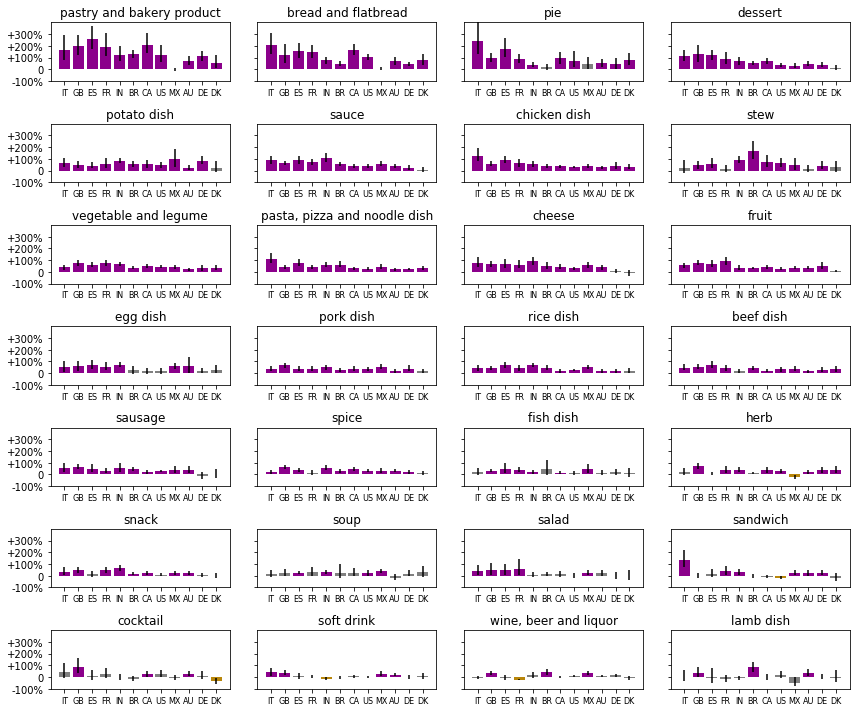

In [39]:
fig, axes = plt.subplots(7,4, figsize = (12,10), sharey = True)

for cnt,c in enumerate(cats_sorted):
    sbplt = axes[math.floor(cnt/4), cnt%4]
    x = df_results.loc[df_results['category'] == c].iloc[sort_by_custom_dict(df_results.loc[df_results['category'] == c]['country'])][['alpha','country','alpha_ste']]
    
    colors_bars = []
    for i in range(12):
        if x['alpha'].values[i]>0 and x['alpha'].values[i]-2*x['alpha_ste'].values[i]>0:
            colors_bars.append('darkmagenta')
        elif x['alpha'].values[i]<0 and x['alpha'].values[i]+2*x['alpha_ste'].values[i]<0:
            colors_bars.append('darkgoldenrod')
        else:
            colors_bars.append('gray')
            
    #sbplt.bar(range(12),x['alpha'].apply(lambda x: np.exp(x)-1), yerr = 2*x['alpha_ste'].apply(lambda x: np.exp(x)-1), color = colors_bars)
    
    sbplt.bar(range(12),x['alpha'].apply(lambda x: np.exp(x)-1),
            #here we convert errors back to linear scale
            yerr = np.array([x['alpha'].apply(lambda x: np.exp(x)-1) - (x['alpha']-2*x['alpha_ste']).apply(lambda x: np.exp(x)-1),
                            (x['alpha']+2*x['alpha_ste']).apply(lambda x: np.exp(x)-1) - x['alpha'].apply(lambda x: np.exp(x)-1)]), 
            color = colors_bars)
    
    sbplt.set_xticks(range(12))
    sbplt.set_xticklabels(x['country'], fontsize= 8)
    sbplt.set_title(c)
    
    sbplt.set_yticks([-1,0,1,2,3])
    sbplt.set_yticklabels(["-100%","0","+100%","+200%","+300%"])
    sbplt.set_ylim([-1,4])

#fig.suptitle("α", position = (0.5, 1.05))
plt.tight_layout()

## 2. In all countries, show alpha in different cats

In [40]:
sorterIndex = dict(zip(cats_sorted, range(len(cats_sorted))))

def sort_pd(key=None,reverse=False):
    def sorter(series):
        series_list = list(series)
        return [series_list.index(i) 
           for i in sorted(series_list,key=key,reverse=reverse)]
    return sorter

sort_by_custom_dict = sort_pd(key=sorterIndex.get)

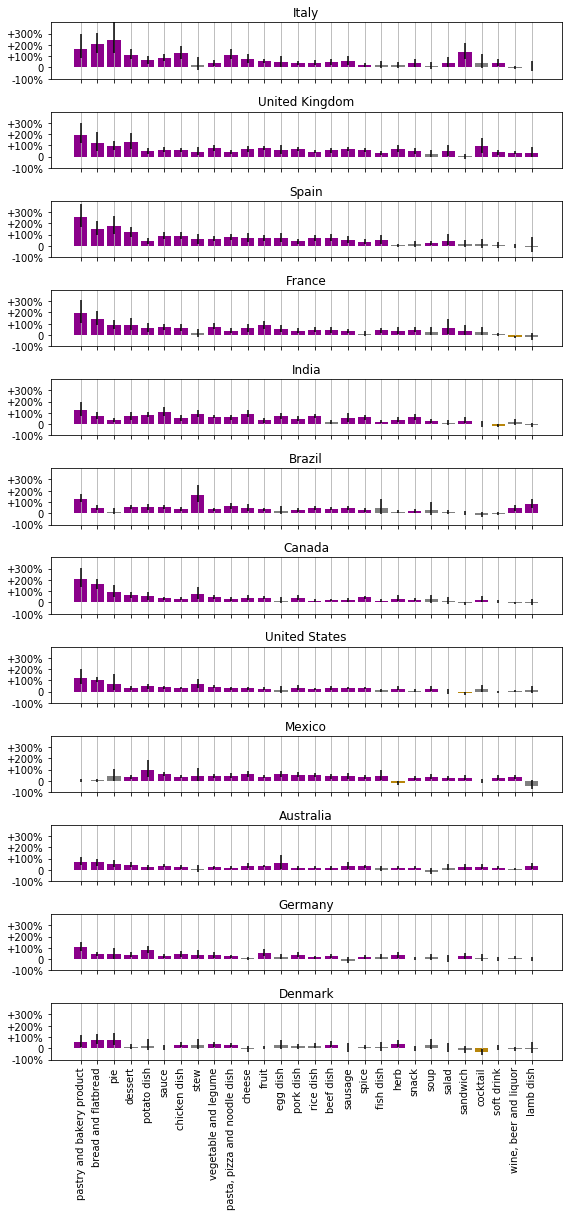

In [41]:
fig, axes = plt.subplots(12,1, figsize = (8,17), sharey = True)

for cnt,country in enumerate(countries_sorted):    
    sbplt = axes[cnt]
    
    x = df_results.loc[df_results['country'] == country].iloc[sort_by_custom_dict(df_results.loc[df_results['country'] == country]['category'])][['alpha','category','alpha_ste']]
    #x = df_results.loc[df_results['country'] == country].sort_values(by='category', ascending = True)[['alpha','category','alpha_ste']]
    
    colors_bars = []
    for i in range(28):
        if x['alpha'].values[i]>0 and x['alpha'].values[i]-2*x['alpha_ste'].values[i]>0:
            colors_bars.append('darkmagenta')
        elif x['alpha'].values[i]<0 and x['alpha'].values[i]+2*x['alpha_ste'].values[i]<0:
            colors_bars.append('darkgoldenrod')
        else:
            colors_bars.append('gray')
            
            
    sbplt.bar(range(28),x['alpha'].apply(lambda x: np.exp(x)-1),
            #here we convert errors back to linear scale
            yerr = np.array([x['alpha'].apply(lambda x: np.exp(x)-1) - (x['alpha']-2*x['alpha_ste']).apply(lambda x: np.exp(x)-1),
                            (x['alpha']+2*x['alpha_ste']).apply(lambda x: np.exp(x)-1) - x['alpha'].apply(lambda x: np.exp(x)-1)]), 
            color = colors_bars
           )
    
    sbplt.set_ylim([-1,4])

    sbplt.set_xticks(range(28))
    
    if cnt == 11:
        sbplt.set_xticklabels(x['category'], fontsize= 10, rotation = 90)
    else:
        sbplt.set_xticklabels([])

    sbplt.set_title(full_names[country])

    sbplt.set_yticks([-1,0,1,2,3])
    sbplt.set_yticklabels(["-100%","0","+100%","+200%","+300%"])
    sbplt.set_ylim([-1,4])
    
    sbplt.grid(axis = 'x')


#fig.suptitle("α", position = (0.5, 1))
plt.tight_layout()

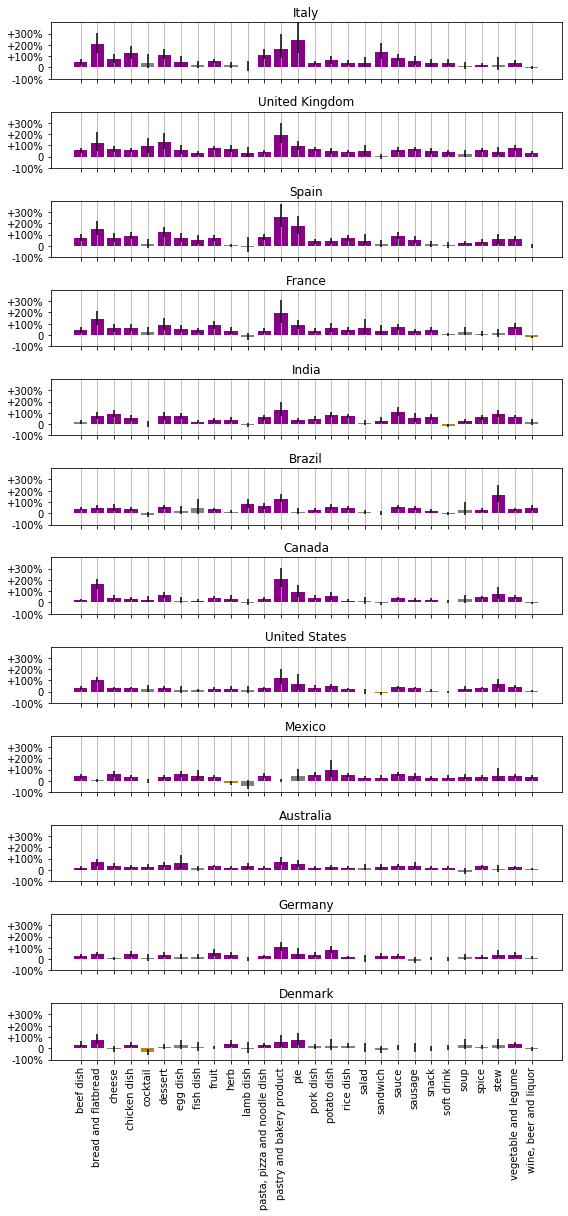

In [42]:
fig, axes = plt.subplots(12,1, figsize = (8,17), sharey = True)

for cnt,country in enumerate(countries_sorted):    
    sbplt = axes[cnt]
    
    #x = df_results.loc[df_results['country'] == country].iloc[sort_by_custom_dict(df_results.loc[df_results['country'] == country]['category'])][['alpha','category','alpha_ste']]
    x = df_results.loc[df_results['country'] == country].sort_values(by='category', ascending = True)[['alpha','category','alpha_ste']]
    
    colors_bars = []
    for i in range(28):
        if x['alpha'].values[i]>0 and x['alpha'].values[i]-2*x['alpha_ste'].values[i]>0:
            colors_bars.append('darkmagenta')
        elif x['alpha'].values[i]<0 and x['alpha'].values[i]+2*x['alpha_ste'].values[i]<0:
            colors_bars.append('darkgoldenrod')
        else:
            colors_bars.append('gray')
            
            
    sbplt.bar(range(28),x['alpha'].apply(lambda x: np.exp(x)-1),
            #here we convert errors back to linear scale
            yerr = np.array([x['alpha'].apply(lambda x: np.exp(x)-1) - (x['alpha']-2*x['alpha_ste']).apply(lambda x: np.exp(x)-1),
                            (x['alpha']+2*x['alpha_ste']).apply(lambda x: np.exp(x)-1) - x['alpha'].apply(lambda x: np.exp(x)-1)]), 
            color = colors_bars
           )
    
    sbplt.set_ylim([-1,4])

    sbplt.set_xticks(range(28))
    
    if cnt == 11:
        sbplt.set_xticklabels(x['category'], fontsize= 10, rotation = 90)
    else:
        sbplt.set_xticklabels([])

    sbplt.set_title(full_names[country])

    sbplt.set_yticks([-1,0,1,2,3])
    sbplt.set_yticklabels(["-100%","0","+100%","+200%","+300%"])
    sbplt.set_ylim([-1,4])
    
    sbplt.grid(axis = 'x')


#fig.suptitle("α", position = (0.5, 1))
plt.tight_layout()

## 2D visualization

In [43]:
dict_max_mobility = {'AU': ("2020-04-15", 21.714285714285715),
    'BR': ("2020-03-27",  20.857142857142858),
    'CA': ("2020-04-15",  23.285714285714285),
    'FR': ("2020-03-29",  30.428571428571427),
    'DE': ("2020-04-15",  17.428571428571427),
    'IN': ("2020-04-13",  29.142857142857142),
    'IT': ("2020-03-30",  31.571428571428573),
    'MX': ("2020-04-14",  21.142857142857142),
    'ES': ("2020-04-12",  31.428571428571427),
    'GB': ("2020-04-15",  25.714285714285715),
    'US': ("2020-04-09",  19.428571428571427),
    'DK': ("2020-03-23",  16.857142857142858)}

In [44]:
array_pca = []

for cnt,country in enumerate(countries_sorted):    
    x = df_results.loc[df_results['country'] == country].sort_values(by='category', ascending = True)[['alpha','category','alpha_ste']]
    array_pca.append(x['alpha'].values)

transformed = StandardScaler().fit_transform(np.array(array_pca))

In [45]:
pca = PCA(n_components=2)
transformed = pca.fit_transform(transformed , 2)

Text(0, 0.5, 'Second principal component (16.1%)')

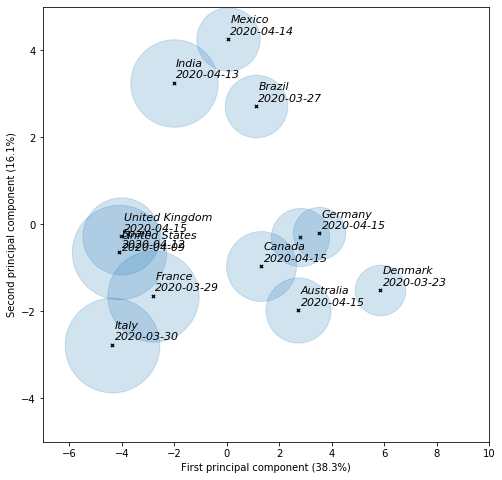

In [46]:
fig, axes = plt.subplots(1,1,figsize= (8,8))

for cnt,i in enumerate(transformed):
    plt.scatter(i[0],i[1], marker = 'x', s= 10, color = 'black')
    
    
    if countries_sorted[cnt] == 'US':
        plt.annotate(full_names[countries_sorted[cnt]]+'\n'+\
                 dict_max_mobility[countries_sorted[cnt]][0],(-4,-0.6), 
                 style = 'italic', fontsize = 11)
    else:
        plt.annotate(full_names[countries_sorted[cnt]]+'\n'+\
                 dict_max_mobility[countries_sorted[cnt]][0],(i[0]+0.1,i[1]+0.1), 
                 style = 'italic', fontsize = 11)
        
    plt.scatter(i[0],i[1],s = (dict_max_mobility[countries_sorted[cnt]][1]*3)**2, color = 'tab:blue', alpha = 0.2)
    
plt.ylim([-5,5])
plt.xlim([-7,10])
plt.xlabel('First principal component (' + str(100*pca.explained_variance_ratio_[0])[:4]+"%)")
plt.ylabel('Second principal component ('+ str(100*pca.explained_variance_ratio_[1])[:4]+"%)")

## 4. All countries together (no interaction term, no indicator for country)

In [47]:
def generate_equation_pulled_interactions(order):
    if order == 'Cubic':
        eq = "volume_total ~ intervention_flag*k*year*C(category) + intervention_flag*np.power(k,2)*year*C(category) + intervention_flag*np.power(k,3)*year*C(category)"
    elif order == "Quadratic":
        eq = "volume_total ~ intervention_flag*k*year*C(category) + intervention_flag*np.power(k,2)*year*C(category)"
    elif order == "Linear":
        eq = "volume_total ~ intervention_flag*k*year*C(category)"
    elif order == 'Constant':
        eq = "volume_total ~ intervention_flag*year*C(category)"
    return eq
    

In [48]:
df_temp

country                   category   k  volume_total  volume_percent  \
0          FR                    dessert -10      7.620684        0.181580   
1          FR                    dessert  -9      7.752114        0.198787   
2          FR                    dessert  -8      7.865853        0.215539   
3          FR                    dessert  -7      8.071547        0.256282   
4          FR                    dessert  -6      7.973552        0.237320   
...       ...                        ...  ..           ...             ...   
40752      DK  pastry and bakery product  26      2.425417        0.006925   
40753      DK  pastry and bakery product  27      2.555000        0.007779   
40754      DK  pastry and bakery product  28      2.819895        0.010389   
40755      DK  pastry and bakery product  29      2.597836        0.007995   
40756      DK  pastry and bakery product  30      2.860574        0.009096   

       year  intervention_flag  
0      2019                  0  
1      2019                  0  
2      2019                  0  
3      2019                  0  
4      2019                  0  
...     ...                ...  
40752  2020                  1  
40753  2020                  1  
40754  2020                  1  
40755  2020                  1  
40756  2020                  1  

[27776 rows x 7 columns]

In [49]:
df_temp = df.loc[(df['k'] >= -k) & (df['k'] <= k)].copy()

df_temp['volume_total'] = df_temp['volume_total'].apply(np.log)

mod_pulled = smf.ols(generate_equation_pulled_interactions('Linear'), data = df_temp)

result_interactions_pulled = mod.fit(cov_type='hc0')

In [59]:
result_interactions_pulled.summary()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4031, but rank is 4024
  'rank is %d' % (J, J_), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           volume_total   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     6030.
Date:                Mon, 29 Mar 2021   Prob (F-statistic):               0.00
Time:                        15:33:37   Log-Likelihood:                 24589.
No. Observations:               27776   AIC:                        -4.111e+04
Df Residuals:                   23744   BIC:                            -7923.
Df Model:                        4031                                         
Covariance Type:                  hc0                                         
==============================================================================================================================================================================
                                                                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                      5.3803      0.013    399.448      0.000       5.354       5.407
year[T.2020]                                                                                                  -0.0204      0.032     -0.635      0.526      -0.083       0.043
C(country)[T.BR]                                                                                               1.4568      0.045     32.020      0.000       1.368       1.546
C(country)[T.CA]                                                                                               0.0750      0.033      2.255      0.024       0.010       0.140
C(country)[T.DE]                                                                                              -0.5773      0.042    -13.816      0.000      -0.659      -0.495
C(country)[T.DK]                                                                                              -1.0621      0.118     -8.975      0.000      -1.294      -0.830
C(country)[T.ES]                                                                                               0.0610      0.030      2.046      0.041       0.003       0.119
C(country)[T.FR]                                                                                               0.4812      0.019     24.870      0.000       0.443       0.519
C(country)[T.GB]                                                                                              -0.1230      0.043     -2.835      0.005      -0.208      -0.038
C(country)[T.IN]                                                                                              -0.0217      0.039     -0.563      0.573      -0.097       0.054
C(country)[T.IT]                                                                                              -0.2585      0.032     -7.964      0.000      -0.322      -0.195
C(country)[T.MX]                                                                                              -0.8212      0.069    -11.839      0.000      -0.957      -0.685
C(country)[T.US]                                                                                               0.5934      0.076      7.778      0.000       0.444       0.743
C(category)[T.bread and flatbread]                                                                            -0.7096      0.039    -18.256      0.000      -0.786      -0.633
C(category)[T.cheese]                                                                                       

In [50]:
default_category = 'beef dish'

In [51]:
alpha_baseline = 'intervention_flag:year[T.2020]'
beta_baseline = 'intervention_flag:k:year[T.2020]'

In [80]:
list_results = []


for c in cats:

    entry = {}
    entry['category'] = c

    suffix_category = (':C(category)[T.'+c+']')

    if c == default_category:

        total_alpha = (result_interactions.params[alpha_baseline])
        total_alpha_error = (result_interactions.bse[alpha_baseline])

        total_beta = (result_interactions.params[beta_baseline])
        total_beta_error = (result_interactions.bse[beta_baseline])


    elif c!= default_category:

        total_alpha = (result_interactions.params[alpha_baseline]) \
                + (result_interactions.params[alpha_baseline + suffix_category]) 
        total_alpha_error = (get_standard_error_sum([alpha_baseline, 
                                                     alpha_baseline + suffix_category]))

        total_beta = (result_interactions.params[beta_baseline]) \
                + (result_interactions.params[beta_baseline + suffix_category]) 
        total_beta_error = (get_standard_error_sum([beta_baseline, 
                                                     beta_baseline + suffix_category]))




    entry['alpha'] = total_alpha
    entry['alpha_ste'] = total_alpha_error
    entry['beta'] = total_beta
    entry['beta_ste'] = total_beta_error


    list_results.append(entry)

In [81]:
df_results = pd.DataFrame(list_results)

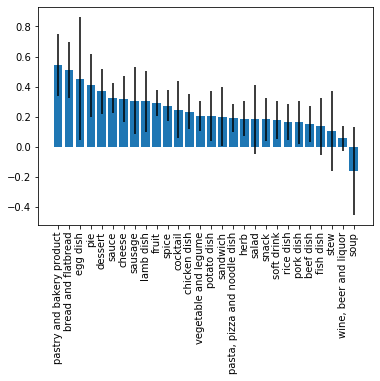

In [82]:
plt.bar(range(28),df_results.sort_values(by = 'alpha', ascending= False)['alpha'], 
        yerr = 2*df_results.sort_values(by = 'alpha', ascending= False)['alpha_ste'])

plt.xticks(range(28),df_results.sort_values(by = 'alpha', ascending= False)['category'], rotation = 90);

(-0.5, 1.5)

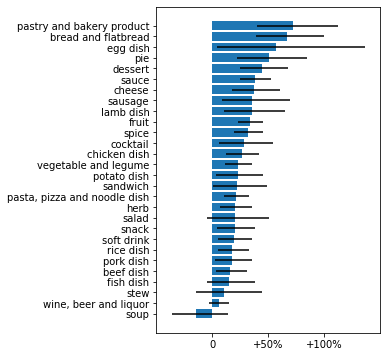

In [96]:
fig, axes = plt.subplots(1,1,figsize= (4,6))

x = df_results.sort_values(by = 'alpha', ascending= True)

plt.barh(range(28),x['alpha'].apply(lambda x: np.exp(x)-1),
            #here we convert errors back to linear scale
            xerr = np.array([x['alpha'].apply(lambda x: np.exp(x)-1) - (x['alpha']-2*x['alpha_ste']).apply(lambda x: np.exp(x)-1),
                            (x['alpha']+2*x['alpha_ste']).apply(lambda x: np.exp(x)-1) - x['alpha'].apply(lambda x: np.exp(x)-1)])
           )
    
plt.xticks([-1,0,0.5,1,2,3],["-100%","0","+50%","+100%","+200%","+300%"])

plt.yticks(range(28),df_results.sort_values(by = 'alpha', ascending= True)['category']);

plt.xlim([-0.5,1.5])

# 5. Get number of days until back to normal, for each country and for each category

In [55]:
df_temp = df.loc[(df['k'] >= -k) & (df['k'] <= k)].copy()

df_temp['volume_total'] = df_temp['volume_total'].apply(np.log)

mod = smf.ols(generate_equation_interactions('Linear'), data = df_temp)

result_interactions = mod.fit(cov_type='hc0')

In [56]:
default_country = 'AU'
default_category = 'beef dish'

alpha_baseline = 'intervention_flag:year[T.2020]'
beta_baseline = 'intervention_flag:k:year[T.2020]'
gamma_baseline = 'intervention_flag:np.power(k, 2):year[T.2020]'

list_results = []



for country in full_names.keys():
    for c in cats:
        
        entry = {}
        entry['country']  = country
        entry['category'] = c
        
        suffix_country = (':C(country)[T.'+country+']')
        suffix_category = (':C(category)[T.'+c+']')
        
        if country == default_country and c == default_category:
            
            total_alpha = (result_interactions.params[alpha_baseline])
            total_alpha_error = (result_interactions.bse[alpha_baseline])
            
            total_beta = (result_interactions.params[beta_baseline])
            total_beta_error = (result_interactions.bse[beta_baseline])
            

        elif country == default_country and c != default_category:
            
            total_alpha = (result_interactions.params[alpha_baseline]) \
                    + (result_interactions.params[alpha_baseline + suffix_category]) 
            total_alpha_error = (get_standard_error_sum([alpha_baseline, 
                                                         alpha_baseline + suffix_category]))
            
            total_beta = (result_interactions.params[beta_baseline]) \
                    + (result_interactions.params[beta_baseline + suffix_category]) 
            total_beta_error = (get_standard_error_sum([beta_baseline, 
                                                         beta_baseline + suffix_category]))
            

        elif country != default_country and c == default_category:
            
            total_alpha = (result_interactions.params[alpha_baseline]) \
                    + (result_interactions.params[alpha_baseline + suffix_country]) 
            total_alpha_error = (get_standard_error_sum([alpha_baseline,
                                                         alpha_baseline + suffix_country]))
            
            total_beta = (result_interactions.params[beta_baseline]) \
                    + (result_interactions.params[beta_baseline + suffix_country]) 
            total_beta_error = (get_standard_error_sum([beta_baseline,
                                                         beta_baseline + suffix_country]))
            

        else:
            total_alpha = (result_interactions.params[alpha_baseline]) \
                    + (result_interactions.params[alpha_baseline + suffix_country]) \
                    + (result_interactions.params[alpha_baseline + suffix_category]) \
                    + (result_interactions.params[alpha_baseline + suffix_country + suffix_category])
            
            total_alpha_error = (get_standard_error_sum([alpha_baseline, 
                                                         alpha_baseline + suffix_category,
                                                         alpha_baseline + suffix_country, 
                                                         alpha_baseline + suffix_country + suffix_category]))
            
            total_beta = (result_interactions.params[beta_baseline]) \
                    + (result_interactions.params[beta_baseline + suffix_country]) \
                    + (result_interactions.params[beta_baseline + suffix_category]) \
                    + (result_interactions.params[beta_baseline + suffix_country + suffix_category])
            
            total_beta_error = (get_standard_error_sum([beta_baseline, 
                                                         beta_baseline + suffix_category,
                                                         beta_baseline + suffix_country, 
                                                         beta_baseline + suffix_country + suffix_category]))
            

        entry['alpha'] = total_alpha
        entry['alpha_ste'] = total_alpha_error
        entry['beta'] = total_beta
        entry['beta_ste'] = total_beta_error

        
        list_results.append(entry)
        
df_results = pd.DataFrame(list_results)


In [57]:
df_results

country                   category     alpha  alpha_ste      beta  \
0        AU                    dessert  0.368719   0.075104  0.002025   
1        AU                 soft drink  0.178360   0.062550  0.013177   
2        AU                  rice dish  0.166270   0.059846  0.000136   
3        AU                       soup -0.159353   0.145514 -0.022005   
4        AU                      spice  0.274748   0.049902 -0.004415   
..      ...                        ...       ...        ...       ...   
331      DK                   cocktail -0.459731   0.175941 -0.045647   
332      DK                      salad  0.000324   0.198888 -0.010378   
333      DK                   sandwich -0.186457   0.186538 -0.026493   
334      DK                    sausage  0.000758   0.187260 -0.034047   
335      DK  pastry and bakery product  0.432152   0.177637 -0.031266   

     beta_ste  
0    0.006380  
1    0.006175  
2    0.004917  
3    0.011981  
4    0.003986  
..        ...  
331  0.018213  
332  0.019168  
333  0.027428  
334  0.021883  
335  0.021478  

[336 rows x 6 columns]

In [58]:
lst_heatmap = []
lst_heatmap_size_long_term = []

for c in cats:
    for country in sorted(list(full_names.keys())):
        #if c == 'bread and flatbread':
            entry = {}
            entry['country'] = country
            entry['category'] = c
            
            entry2 = {}
            entry2['country'] = country
            entry2['category'] = c
            #print(country, c)
            
            x = df_results.loc[(df_results['country'] == country) & (df_results['category'] == c)].iloc[0].copy()
            
            if x['alpha']>0 and x['alpha']-2*x['alpha_ste']>0:
                #print('significant short term increase')
                tmp = df_temp.loc[(df_temp['country'] == country)&(df_temp['category'] == c)].copy()

                #2019
                tmp1 = tmp.loc[tmp['year'] == '2019'].copy()

                tmp2 = tmp.loc[tmp['year'] == '2020'].copy()

                upper_error_2019 = result_interactions.get_prediction(tmp1.loc[tmp1['k']>=0]).conf_int()[:,1]
                lower_error_2020 = result_interactions.get_prediction(tmp2.loc[tmp2['k']>=0]).conf_int()[:,0]

                if sum(lower_error_2020 < upper_error_2019) == 0:
                    #print('doesn\'t fall back to normal')
                    mean2 = (np.mean(result_interactions.get_prediction(tmp2.loc[tmp2['k']>=0]).predicted_mean[-4:]))
                    mean1 = (np.mean(result_interactions.get_prediction(tmp1.loc[tmp1['k']>=0]).predicted_mean[-4:]))
                    
                    entry2['value'] = (np.exp(mean2) - np.exp(mean1)) / np.exp(mean1)

                    entry['value'] = 1000
                else:
                    v = (lower_error_2020 < upper_error_2019).argmax() + 1
                    #print('falls back to normal in ',v)
                    entry['value'] = v
                    entry2['value'] = 0

            elif x['alpha']<0 and x['alpha']+2*x['alpha_ste']<0:
                #print('significant short term decrease')
                entry['value'] = 0
                entry2['value'] = 0
            else:
                entry['value'] = 0
                entry2['value'] = 0
                #('no significant short term changes')
            
            lst_heatmap.append(entry)
            lst_heatmap_size_long_term.append(entry2)
            #0. Question zero: significant short term changes?
            
            #if yes, 1. Question one: does it ever go back to normal?
                
            #if yes:
                #how long it takes?

            
            
            
            
            continue
            plt.figure()
            plt.fill_between(tmp1['k'],result_interactions.get_prediction(tmp1).conf_int()[:,0],
                     result_interactions.get_prediction(tmp1).conf_int()[:,1], alpha = 0.3, color = 'gray')
            plt.plot(tmp1.loc[tmp1['k']<0]['k'],result_interactions.get_prediction(tmp1.loc[tmp1['k']<0]).predicted_mean, color = 'tab:orange', label = '2020')
            plt.plot(tmp1.loc[tmp1['k']>=0]['k'],result_interactions.get_prediction(tmp1.loc[tmp1['k']>=0]).predicted_mean, color = 'tab:orange', label = '2020')

            plt.scatter(tmp1['k'],tmp1['volume_total'], color = 'tab:orange')




            

            plt.fill_between(tmp2['k'],result_interactions.get_prediction(tmp2).conf_int()[:,0],
                     result_interactions.get_prediction(tmp2).conf_int()[:,1], alpha = 0.3, color = 'gray')

            plt.plot(tmp2.loc[tmp2['k']<0]['k'],result_interactions.get_prediction(tmp2.loc[tmp2['k']<0]).predicted_mean, color = 'tab:blue', label = '2019')
            plt.plot(tmp2.loc[tmp2['k']>=0]['k'],result_interactions.get_prediction(tmp2.loc[tmp2['k']>=0]).predicted_mean, color = 'tab:blue', label = '2019')

            plt.scatter(tmp2['k'],tmp2['volume_total'], color = 'tab:blue')


            plt.xlabel('k')
            plt.ylabel('log total volume')
            

            

In [59]:
df_heatmap = pd.DataFrame(lst_heatmap)
matrix = np.zeros((28,12))

df_heatmap_longterm = pd.DataFrame(lst_heatmap_size_long_term)
matrix_longterm = np.zeros((28,12))

In [60]:
df_heatmap_longterm

country                   category     value
0        AU                    dessert  0.125537
1        BR                    dessert  0.000000
2        CA                    dessert  0.000000
3        DE                    dessert  0.000000
4        DK                    dessert  0.000000
..      ...                        ...       ...
331      GB  pastry and bakery product  0.000000
332      IN  pastry and bakery product  0.000000
333      IT  pastry and bakery product  0.000000
334      MX  pastry and bakery product  0.000000
335      US  pastry and bakery product  0.000000

[336 rows x 3 columns]

In [61]:
for cnt1,country in enumerate(countries_sorted):   
    for cnt2,cat in enumerate(cats_sorted):
        x = df_heatmap.loc[(df_heatmap['country'] == country) & (df_heatmap['category'] == cat)].iloc[0].copy()
        matrix[cnt2,cnt1] = (x['value']/7)    

In [62]:
for cnt1,country in enumerate(countries_sorted):   
    for cnt2,cat in enumerate(cats_sorted):
        x = df_heatmap_longterm.loc[(df_heatmap_longterm['country'] == country) & (df_heatmap_longterm['category'] == cat)].iloc[0].copy()
        matrix_longterm[cnt2,cnt1] = (x['value'])    

In [63]:
mask = (matrix <1) + (matrix > 140)

In [64]:
matrix.shape

(28, 12)

In [65]:
annotations = np.empty((12,28), dtype='object')

for i in range(12):
    for j in range(28):
        if (matrix > 140)[j][i]:    
            annotations[i][j] = "+"
        else:
            annotations[i][j] = ""

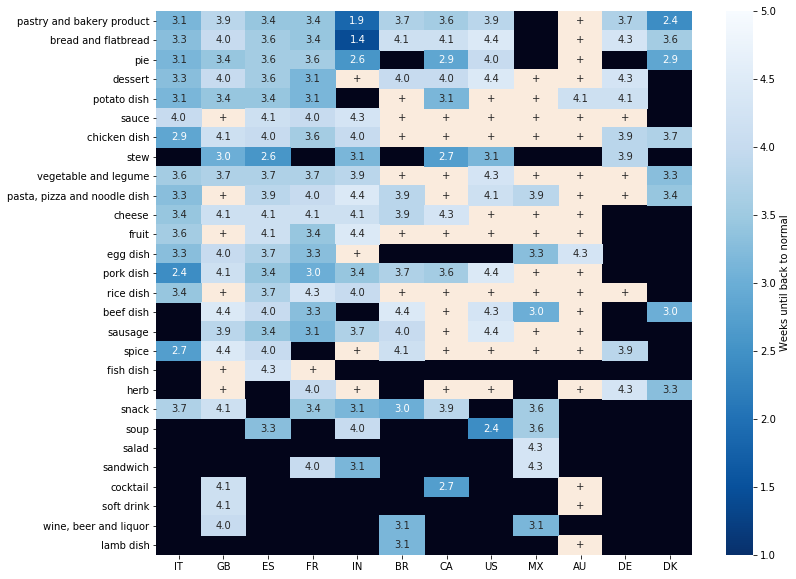

In [66]:
fig, ax = plt.subplots(1,1,figsize= (12,10))

sns.heatmap(matrix>140, cbar=False,
            annot = annotations.T,  fmt="")

sns.heatmap(matrix, mask = mask, vmin = 1, vmax = 5, annot=True, fmt=".1f", 
            cmap="Blues_r", cbar_kws={'label': 'Weeks until back to normal'})

ax.set_yticks(np.array(range(28))+0.5)
ax.set_yticklabels(cats_sorted, rotation = 0);

ax.set_xticks(np.array(range(12))+0.5)
ax.set_xticklabels(countries_sorted, rotation = 0);

In [67]:
annotations = np.empty((12,28), dtype='object')

for i in range(12):
    for j in range(28):
        if (matrix > 140)[j][i]:    
            annotations[i][j] = "+"+str(matrix_longterm[j][i]*100)[:3]+"%"
        else:
            annotations[i][j] = ""

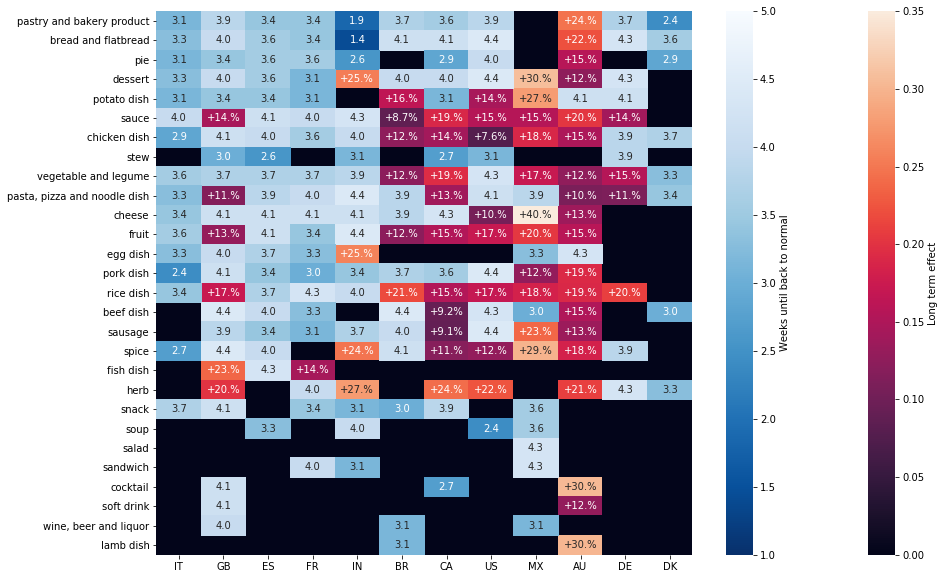

In [68]:
fig, ax = plt.subplots(1,1,figsize= (15,10))

sns.heatmap(matrix_longterm,  vmin = 0, vmax = 0.35, cbar_kws={'label': 'Long term effect'},
            annot = annotations.T,  fmt="")

sns.heatmap(matrix, mask = mask, vmin = 1, vmax = 5, annot=True, fmt=".1f", 
            cmap="Blues_r", cbar_kws={'label': 'Weeks until back to normal'})

ax.set_yticks(np.array(range(28))+0.5)
ax.set_yticklabels(cats_sorted, rotation = 0);

ax.set_xticks(np.array(range(12))+0.5)
ax.set_xticklabels(countries_sorted, rotation = 0);

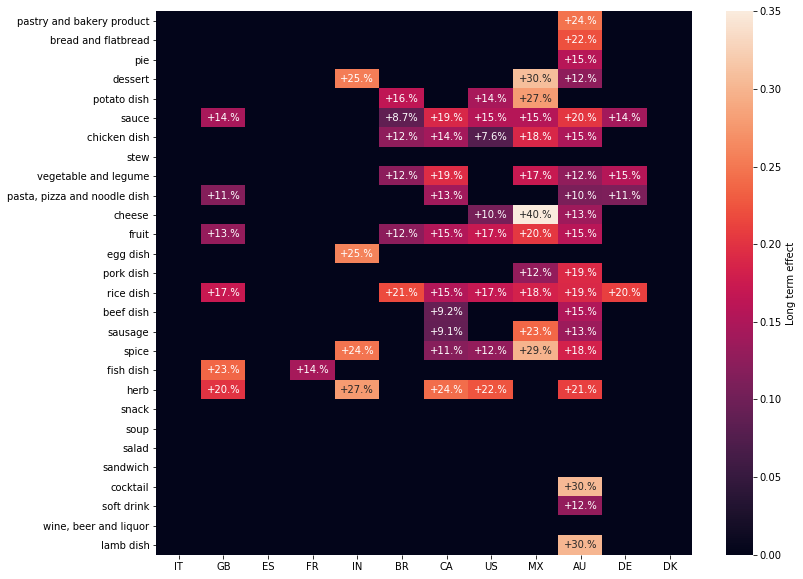

In [69]:
fig, ax = plt.subplots(1,1,figsize= (12,10))

sns.heatmap(matrix_longterm,  vmin = 0, vmax = 0.35, cbar_kws={'label': 'Long term effect'},
            annot = annotations.T,  fmt="")


ax.set_yticks(np.array(range(28))+0.5)
ax.set_yticklabels(cats_sorted, rotation = 0);

ax.set_xticks(np.array(range(12))+0.5)
ax.set_xticklabels(countries_sorted, rotation = 0);

In [70]:
np.exp(mean2)

59.651163983113115

In [71]:
(np.exp(mean2) - np.exp(mean1))  / np.exp(mean1)

0.24662236539065532

#### Make a visualization for Top 4 categories
#### Pastry and bakery product, bread and flatbread, pie, dessert

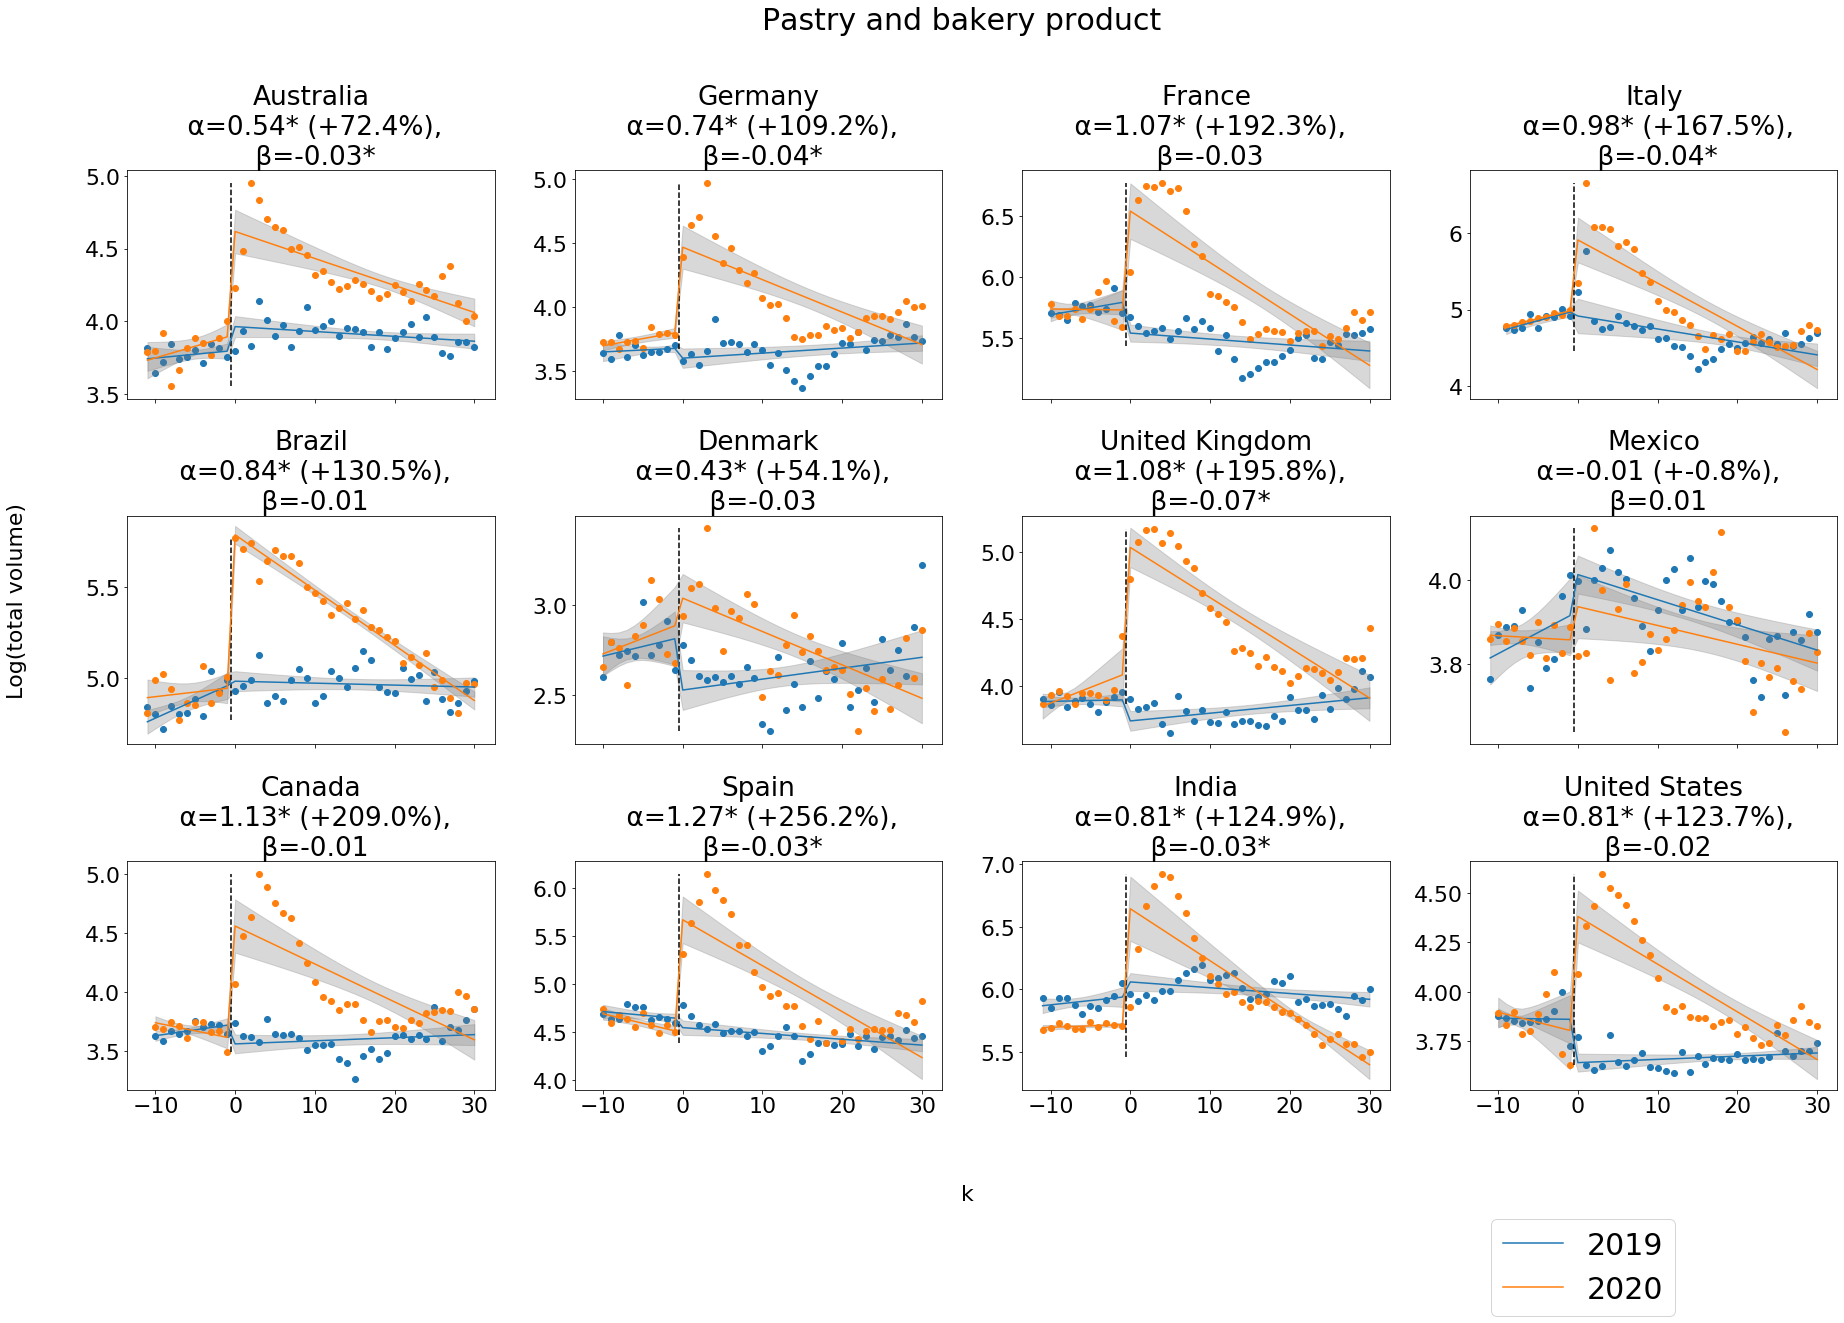

In [190]:
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

fig, ax = plt.subplots(3,4, figsize= (25,15), sharex = True, sharey = False)

cnt = 0
for country,gr1 in df.groupby('country'):
    for category,gr2 in gr1.groupby('category'):
        if category == 'pastry and bakery product':
            gr2
            sbplt = ax[cnt%3, math.floor(cnt/3)]
            df_temp = gr2.loc[(gr2['k'] >= -k) & (gr2['k'] <= k)].copy()

            df_temp['volume_total'] = df_temp['volume_total'].apply(np.log)

            df_temp = df_temp.loc[df_temp['year'] == '2019']

            sbplt.fill_between(df_temp['k'].values,
                                result_interactions.get_prediction(df_temp).conf_int()[:,0],
                                result_interactions.get_prediction(df_temp).conf_int()[:,1], alpha = 0.3, color = 'gray')

            sbplt.plot(df_temp['k'].values,
                       result_interactions.get_prediction(df_temp).predicted_mean, 
                       color = 'tab:blue', label = '2019')

            sbplt.scatter(df_temp['k'].values,df_temp['volume_total'].values, color = 'tab:blue')


            df_temp = gr2.loc[(gr2['k'] >= -k) & (gr2['k'] <= k)].copy()

            df_temp['volume_total'] = df_temp['volume_total'].apply(np.log)

            df_temp = df_temp.loc[df_temp['year'] == '2020']

            sbplt.fill_between(df_temp['k'].values,
                                result_interactions.get_prediction(df_temp).conf_int()[:,0],
                                result_interactions.get_prediction(df_temp).conf_int()[:,1], alpha = 0.3, color = 'gray')

            sbplt.plot(df_temp['k'].values,
                       result_interactions.get_prediction(df_temp).predicted_mean, 
                       color = 'tab:orange', label = '2020')

            sbplt.scatter(df_temp['k'].values,df_temp['volume_total'].values, color = 'tab:orange')

            
            
            sbplt.vlines(-0.5,(df_temp['volume_total'].values.min()),
                         (df_temp['volume_total'].values.max()), linestyle = '--')
            sbplt.set_xticks([-10,0,10,20,30])
            
            tmp = df_results_interactions.loc[(df_results_interactions['country'] == country)& (df_results_interactions['category'] == category)].iloc[0]
    
            sbplt.set_title(full_names[country]+'\n α='+str(round(tmp['alpha'],2))+(make_star_ste(tmp['alpha'],tmp['alpha_ste'])) + ' (+' +str(round((np.exp(tmp['alpha'])-1)*100,1))+ '%)' +\
                        ',\n β='+str(round(tmp['beta'],2)) + (make_star_ste(tmp['beta'],tmp['beta_ste'])))
            
            
    cnt+=1
   
plt.tight_layout()
fig.text(-0.03, 0.5, 'Log(total volume)', va='center', rotation='vertical')
fig.text(0.5, -0.05, 'k', va='center', rotation='horizontal')


fig.suptitle('Pastry and bakery product', position = (0.5,1.05), fontsize= 30)
sbplt.legend(bbox_to_anchor = (0.6,-0.5), fontsize= 30)



In [188]:

str(((np.exp(tmp['alpha'])-1)/100))

'0.012368072689307303'

In [175]:
def make_star_ste(value,ste):
    if value>0 and value-2*ste>0:
        return '*'
    elif value<0 and value+2*ste<0:
        return '*'
    else:
        return ''